In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
hot = pd.read_csv('hot100.csv')

In [7]:
hot['date'] = pd.to_datetime(hot['date'], errors='coerce')

In [8]:
hot['position'] = hot['position'] * (101 - hot['position'])

In [9]:
hot.to_csv('hot_new_position.csv',index = False)

In [10]:
hot_5870 = hot[(hot['date'] > '1958-01-01') &(hot['date'] < '1970-12-31')]

In [11]:
hot_5870.to_csv('hot5870_new_position.csv',index = False)

In [12]:
hot_5870_grouped =  hot_5870.groupby(['song','artist'])['position'].agg(['sum','count']).reset_index()

In [13]:
hot_5870_grouped.to_csv('hot_5870_grouped.csv',index = False)

In [14]:
hot_5870_grouped.head()

,song,artist,sum,count
0,'Til,The Angels,25004,14
1,('Til) I Kissed You,The Everly Brothers,18818,16
2,(1-2-3-4-5-6-7) Count The Days,Inez & Charlie Foxx,5394,5
3,(A Ship Will Come) Ein Schiff Wird Kommen,Lale Anderson,2830,4
4,(All Of A Sudden) My Heart Sings,Mel Carter,16710,7


In [15]:
playcount  = pd.read_csv('hot5870_playcount.csv')

In [16]:
playcount.head()

,Unnamed: 0,song,artist,sum,count,lastfm_count
0,0,The Twist,Chubby Checker,576,39,528349.0
1,1,Wipe Out,The Surfaris,1011,30,290333.0
2,2,Harlem Nocturne,The Viscounts,1808,29,20656.0
3,3,The Little Drummer Boy,The Harry Simeone Chorale,1224,28,3138.0
4,4,Running Bear,Johnny Preston,1031,27,78453.0


In [17]:
playcount.drop(['sum','count'], axis = 1, inplace = True)

In [18]:
playcount.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [19]:
playcount.head()

,song,artist,lastfm_count
0,The Twist,Chubby Checker,528349.0
1,Wipe Out,The Surfaris,290333.0
2,Harlem Nocturne,The Viscounts,20656.0
3,The Little Drummer Boy,The Harry Simeone Chorale,3138.0
4,Running Bear,Johnny Preston,78453.0


In [20]:
hot_5870_score_playcount = pd.merge(hot_5870_grouped, playcount, on=['song','artist'], how='inner')

In [21]:
hot_5870_score_playcount.head()

,song,artist,sum,count,lastfm_count
0,'Til,The Angels,25004,14,3774.0
1,('Til) I Kissed You,The Everly Brothers,18818,16,60520.0
2,(1-2-3-4-5-6-7) Count The Days,Inez & Charlie Foxx,5394,5,4460.0
3,(A Ship Will Come) Ein Schiff Wird Kommen,Lale Anderson,2830,4,1.0
4,(All Of A Sudden) My Heart Sings,Mel Carter,16710,7,1015.0


In [22]:
hot_5870_score_playcount.to_csv('hot_5870_score_playcount.csv',index = False)

In [23]:
df5 = hot_5870_grouped.sort_values(['sum','count'],ascending = [False,False])

In [24]:
df5 = df5.reset_index(drop = True )
df5

,song,artist,sum,count
0,Harlem Nocturne,The Viscounts,62252,29
1,Never On Sunday,Don Costa And His Orchestra And Chorus,56062,26
2,Robbin' The Cradle,Tony Bellus,53176,26
3,Moon River,Henry Mancini And His Orchestra,52194,26
4,The Little Drummer Boy,The Harry Simeone Chorale,52096,28
5,Tall Cool One,The Wailers,50508,23
6,Solitary Man,Neil Diamond,50414,24
7,Sunshine Of Your Love,Cream,49008,26
8,But It's Alright,J.J. Jackson,48434,23
9,Wipe Out,The Surfaris,47806,30


In [25]:
df5.columns

Index([u'song', u'artist', u'sum', u'count'], dtype='object')

In [26]:
df5['old_popularity'] = df5.index + 1

In [27]:
df5

,song,artist,sum,count,old_popularity
0,Harlem Nocturne,The Viscounts,62252,29,1
1,Never On Sunday,Don Costa And His Orchestra And Chorus,56062,26,2
2,Robbin' The Cradle,Tony Bellus,53176,26,3
3,Moon River,Henry Mancini And His Orchestra,52194,26,4
4,The Little Drummer Boy,The Harry Simeone Chorale,52096,28,5
5,Tall Cool One,The Wailers,50508,23,6
6,Solitary Man,Neil Diamond,50414,24,7
7,Sunshine Of Your Love,Cream,49008,26,8
8,But It's Alright,J.J. Jackson,48434,23,9
9,Wipe Out,The Surfaris,47806,30,10


In [28]:
old_popularity_df = df5.to_csv('old_popularity.csv')

In [29]:
playcount_sort =  playcount.sort_values(['lastfm_count'],ascending = [False])

In [30]:
playcount_sort = playcount_sort.reset_index(drop = True)
playcount_sort

,song,artist,lastfm_count
0,Paranoid,Black Sabbath,7846242.0
1,The Sound Of Silence,Simon & Garfunkel,7006004.0
2,"Paint It, Black",The Rolling Stones,6971647.0
3,Let It Be,The Beatles,6917316.0
4,Yesterday,The Beatles,6647511.0
5,Immigrant Song,Led Zeppelin,6268358.0
6,Help!,The Beatles,6265950.0
7,Like A Rolling Stone,Bob Dylan,5706300.0
8,Whole Lotta Love,Led Zeppelin,5650518.0
9,People Are Strange,The Doors,5647930.0


In [31]:
playcount_sort['new_popularity'] = playcount_sort.index + 1

In [32]:
playcount_sort

,song,artist,lastfm_count,new_popularity
0,Paranoid,Black Sabbath,7846242.0,1
1,The Sound Of Silence,Simon & Garfunkel,7006004.0,2
2,"Paint It, Black",The Rolling Stones,6971647.0,3
3,Let It Be,The Beatles,6917316.0,4
4,Yesterday,The Beatles,6647511.0,5
5,Immigrant Song,Led Zeppelin,6268358.0,6
6,Help!,The Beatles,6265950.0,7
7,Like A Rolling Stone,Bob Dylan,5706300.0,8
8,Whole Lotta Love,Led Zeppelin,5650518.0,9
9,People Are Strange,The Doors,5647930.0,10


In [33]:
Final_DF = pd.merge(df5, playcount_sort, on=['song','artist'], how='inner')

In [34]:
Final_DF

,song,artist,sum,count,old_popularity,lastfm_count,new_popularity
0,Harlem Nocturne,The Viscounts,62252,29,1,20656.0,2336
1,Never On Sunday,Don Costa And His Orchestra And Chorus,56062,26,2,32.0,7674
2,Robbin' The Cradle,Tony Bellus,53176,26,3,2137.0,4727
3,Moon River,Henry Mancini And His Orchestra,52194,26,4,380162.0,421
4,The Little Drummer Boy,The Harry Simeone Chorale,52096,28,5,3138.0,4309
5,Tall Cool One,The Wailers,50508,23,6,13270.0,2786
6,Solitary Man,Neil Diamond,50414,24,7,270472.0,540
7,Sunshine Of Your Love,Cream,49008,26,8,3592289.0,36
8,But It's Alright,J.J. Jackson,48434,23,9,57245.0,1430
9,Wipe Out,The Surfaris,47806,30,10,290333.0,504


In [35]:
Final_DF.index = Final_DF.index + 1

In [37]:
Final_DF.to_csv('final_df.csv',index= False)

In [39]:

popularity = {'old_popularity':Final_DF['old_popularity'], 'new_popularity':Final_DF['new_popularity']}

popularity = pd.DataFrame(popularity)

#popularity

r = popularity.corr()
print(r)

                new_popularity  old_popularity
new_popularity        1.000000        0.344784
old_popularity        0.344784        1.000000


In [54]:
Final_DF = Final_DF.sort_values(['old_popularity','new_popularity'],ascending = [True,True])


NameError: name 'Final_DF' is not defined

In [3]:
Final_Df = pd.read_csv("final_df.csv")

Final_Df

,song,artist,sum,count,old_popularity,lastfm_count,new_popularity
0,Harlem Nocturne,The Viscounts,62252,29,1,20656.0,2336
1,Never On Sunday,Don Costa And His Orchestra And Chorus,56062,26,2,32.0,7674
2,Robbin' The Cradle,Tony Bellus,53176,26,3,2137.0,4727
3,Moon River,Henry Mancini And His Orchestra,52194,26,4,380162.0,421
4,The Little Drummer Boy,The Harry Simeone Chorale,52096,28,5,3138.0,4309
5,Tall Cool One,The Wailers,50508,23,6,13270.0,2786
6,Solitary Man,Neil Diamond,50414,24,7,270472.0,540
7,Sunshine Of Your Love,Cream,49008,26,8,3592289.0,36
8,But It's Alright,J.J. Jackson,48434,23,9,57245.0,1430
9,Wipe Out,The Surfaris,47806,30,10,290333.0,504


In [3]:
print Final_Df['new_popularity'].loc[2]

4727


In [16]:
rows,cols = Final_Df.shape
count = 0
Final_Df['verdict']=-1
for row in xrange(1,rows) :
    val = Final_Df['new_popularity'].loc[row]
    for i in xrange(0,row):
        if val>Final_Df['new_popularity'].loc[i]:
            Final_Df['verdict'].loc[row] = 0
            break
    #print i
    if i+1 == row:
        Final_Df['verdict'].loc[row] = 1
        count +=1
perc = (count/float(rows))*100
print perc
print count

0.107040913416
9


In [15]:
Final_Df

,song,artist,sum,count,old_popularity,lastfm_count,new_popularity,verdict
0,Harlem Nocturne,The Viscounts,62252,29,1,20656.0,2336,-1
1,Never On Sunday,Don Costa And His Orchestra And Chorus,56062,26,2,32.0,7674,1
2,Robbin' The Cradle,Tony Bellus,53176,26,3,2137.0,4727,0
3,Moon River,Henry Mancini And His Orchestra,52194,26,4,380162.0,421,1
4,The Little Drummer Boy,The Harry Simeone Chorale,52096,28,5,3138.0,4309,0
5,Tall Cool One,The Wailers,50508,23,6,13270.0,2786,0
6,Solitary Man,Neil Diamond,50414,24,7,270472.0,540,0
7,Sunshine Of Your Love,Cream,49008,26,8,3592289.0,36,1
8,But It's Alright,J.J. Jackson,48434,23,9,57245.0,1430,0
9,Wipe Out,The Surfaris,47806,30,10,290333.0,504,0


In [4]:
Final_Df[Final_Df['song']=='Good Vibrations']

,song,artist,sum,count,old_popularity,lastfm_count,new_popularity
4174,Good Vibrations,The Beach Boys,14364,14,4175,2643834.0,61


In [20]:

Final_Df[Final_Df['song']=='The Ballad Of The Green Berets']

,song,artist,sum,count,old_popularity,lastfm_count,new_popularity,verdict
5482,The Ballad Of The Green Berets,SSgt Barry Sadler,9658,13,5483,27851.0,2054,0


6706455.32758
-0.103039264377


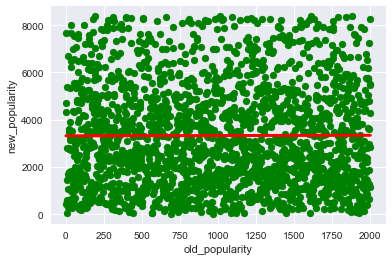

In [62]:


x = Final_Df.loc[1:2000]['old_popularity'].values[:,np.newaxis]
y = Final_Df.loc[1:2000]['new_popularity'].values

#print Final_Df.loc[5000:]['old_popularity'].values
regr = linear_model.LinearRegression()
regr.fit(x,y)
#print regr
z = regr.predict(Final_Df.loc[2000:7000]['old_popularity'].values[:,np.newaxis])
#print z
prediction = pd.DataFrame({'prediction':z,'original':Final_Df.loc[2000:7000]['new_popularity'].values})
#print prediction
print mean_squared_error(prediction['original'], prediction['prediction'])
print r2_score(prediction['original'], prediction['prediction'])
#print regr
plt.scatter(x,y,  color='green')
plt.plot(x, regr.predict(x), color='red', linewidth=3)
plt.xlabel("old_popularity")
plt.ylabel("new_popularity")

plt.show()

In [4]:
import pylast
import pygn
from itertools import *
Final_Df['genre']=''
API_KEY = "512cff1485ecb0ce1e2391e3d165707f"
API_SECRET = 	"f184eb8bfaaa53dfe7ccbf207353f32d"

client_id = '1427175566-EAFDA319593215F0AB195C08B85EF2B0'
userID = pygn.register(client_id)
username = "akasa9525"
password_hash = pylast.md5("stonybrook#2017")

network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET,
                               username=username, password_hash=password_hash)

#Final_Df = Final_Df.tail(50)
#df_temp = Final_Df.tail(50)
count = 0
for index,row in islice(Final_Df.iterrows(), 3852, None):
    try:
        #print "a"
        artist = str(row['artist']).strip()
        #print artist
        song = str(row['song']).strip()
        #print song
        track = network.get_track(artist,song)
        #print track
        album = str(track.get_album()).strip()
        metadata = pygn.search(clientID=client_id, userID=userID, artist=artist, album=album, track=song)
        Final_Df.loc[index,'genre'] = str(metadata['genre']['1']["TEXT"])
        #de_temp.loc[index,'genre'].set_value('z')
        
        #print metadata['genre']['1']["TEXT"]
        #print Final_Df.loc[index,'genre']
    except:
        Final_Df.loc[index, 'genre']= 'nan'
        count = count + 1
        print count
        pass
Final_Df.to_csv("final_df_genre.csv")
#df_temp.to_csv("final.csv")

Ruby Baby
Making Every Minute Count
Patricia
Rudolph The Red Nosed Reindeer
Don't Believe Him, Donna
The Sun Ain't Gonna Shine (Anymore)
Paper Cup
Mother Nature, Father Time
The Very Thought Of You
Hair
Don't Break The Heart That Loves You
Cathy's Clown
The Cat In The Window (The Bird In The Sky)
Big Bad John
Alley-Oop
Anyway The Wind Blows
What Now My Love
No One For Me To Turn To
Tiny Tim
Bye Bye Blues
Sing A Song For Freedom
Chapel In The Moonlight
Pretend
Bobby
Time, Time
Travlin' Man
I'm Just A Country Boy
Love Eyes
Cherry Pink And Apple Blossom White
And When I Die
Lipstick Traces (On A Cigarette)
Ten Lonely Guys
The Switch-A-Roo
Turn Around, Look At Me
Hard To Handle
Everything's Alright
Viva Las Vegas
(Theme from) My Three Sons
1
May I Take A Giant Step (Into Your Heart)
She Wants T' Swim
The Boy From New York City
Look Through My Window
A Big Hunk O' Love
You've Lost That Lovin' Feelin'
If I Were A Carpenter
Can You Jerk Like Me
Cry
Helpless
Cry Me A River
When I Grow Up (To B

Go Ahead And Cry
I Still Get A Thrill (Thinking Of You)
I Don't Want To Spoil The Party
Goodnight My Love
Strawberry Shortcake
Gazachstahagen
Soul Man
I Get Around
It's Your Thing
You've Got To Be Loved
Be My Baby
Canned Ham
A Woman Can Change A Man
Can't Get Enough Of You, Baby
California Girls
Roll Over Beethoven
Cast Your Fate To The Wind
A Hard Day's Night
Mama Told Me (Not To Come)
No Matter What Sign You Are
Who Needs Ya
One Fine Day
The Things We Did Last Summer
You Can Run (But You Can't Hide)
Come Softly To Me
Doctor Feel-Good
I Couldn't Live Without Your Love
Girl You're Too Young
Dedicated Follower Of Fashion
There Goes My Everything
In My Lonely Room
Bluebirds Over The Mountain
Smile
Sloop John B
Something About You
I Promise To Wait My Love
Make Me Forget
Hey Paula
Positively 4th Street
You Don't Know Me
My Real Name
Day For Decision
Can't You Find Another Way (Of Doing It)
The Second Time Around
Street Fighting Man
A Banda (Ah Bahn-da)
There Goes (My Heart Again)
My True 

A Man And A Half
Use Your Head
I Got You (I Feel Good)
Brenda
Do You Wanna Dance?
Ballad Of The Alamo
China Nights (Shina No Yoru)
Stay Together Young Lovers
Lollipops And Roses
Diddle-Dee-Dum (What Happens When Your Love Has Gone)
I'm Gonna Make You Love Me
Worst That Could Happen
You Keep Me Hangin' On
New York Mining Disaster 1941 (Have You Seen My Wife, Mr. Jones)
Ruby Duby Du From Key Witness
Screaming Night Hog
What A Sweet Thing That Was
Bang Bang (My Baby Shot Me Down)
Him Or Me - What's It Gonna Be?
Little Boxes
Mighty Good Lovin'
A Natural Woman (You Make Me Feel Like)
That Same Old Feeling
I Walk The Line
Sometime
Crimson And Clover
So Long Dearie
Can I Trust You?
Mothers Little Helper
Listen To The Band
Did You Ever Have To Make Up Your Mind?
Send Me The Pillow You Dream On
27
Every Night (Without You)
Love's Made A Fool Of You
Kick That Little Foot Sally Ann
Jeremiah Peabody's Poly Unsaturated Quick Dissolving Fast Acting Pleasant T
28
Immigrant Song
Back On My Feet Again


Ticket To Ride
Why Can't You Bring Me Home
What's The Reason
Ebb Tide
Cottonfields
Do Unto Me
I Really Don't Want To Know
Don't You Know Yockomo
Like The Big Guys Do
The Feeling Is Right
Blue Moon
Our Everlasting Love
The Yard Went On Forever
Ling-Ting-Tong
A Million To One
Do Wah Diddy Diddy
Not Too Young To Get Married
It's The Same Old Song
Pledging My Love
Take Me (Just As I Am)
Mom And Dad's Waltz
B'wa Nina (Pretty Girl)
My Uncle Used To Love Me But She Died
I'm In Love Again
Are You Never Coming Home
C.C. Rider
Ready For Your Love
Above The Stars
The Ballad Of John And Yoko
Just Tell Her Jim Said Hello
41
You Mean The World To Me
Reflections
Happy Weekend
The Happening
Look At Granny Run, Run
Past, Present And Future
Private Number
Not Too Long Ago
She Loves You
Baby's First Christmas
Tonight You're Gonna Fall In Love With Me
Forgive Me
Why (Am I Treated So Bad)
I Know You Better Than That
Juke Box Saturday Night
Goodbye Columbus
She Didn't Know (She Kept On Talking)
Respect
The 

Harper Valley P.T.A. (Later That Same Day)
Thank U Very Much
Don't Worry Mother, Your Son's Heart Is Pure
Nel Blu Dipinto Di Blu (Volaré)
60
Whole Lot Of Shakin' Going On
Soon (I'll Be Home Again)
61
Fall In Love With Me
Paranoid
Cinderella
Don't You Miss Me A Little Bit Baby
Roses And Rainbows
You Can Have Her
Sweet Memories
Hello, I Love You
One By One
If You Were A Rock And Roll Record
When The Party Is Over
Wiederseh'n
Will Power
Puffin' On Down The Track
She's Ready
Alvin's Orchestra
You're My Baby (And Don't You Forget It)
Bridge Over Troubled Water
My Life
Breaking Up Is Hard To Do
Lodi
I Am The Walrus
Rain
62
The House Of The Rising Sun
I Wanna Be (Your Everything)
Everglades
No
Try To Remember
Tracks Of My Tears
Sunshine Games
The Long And Winding Road/For You Blue
63
Tennessee Waltz
Memory Lane
I'll Be There
Everybody Do The Sloopy
You Can't Stand Alone
Lullaby Of The Leaves
Young Ideas
Stay Away
I Should Have Known Better
Who's That Knocking
They Remind Me Too Much Of You
64

Mr. Bojangles
Never, Never
Free The People
Hang 'Em High
Born To Be Wild
Here's To You
Just Yesterday
Well-A, Well-A
The Prophecy Of Daniel and John The Divine (Six-Six-Six)
California Earthquake
Silly, Silly, Fool
Bring Back The Time
Land Of A Thousand Dances (Part I)
70
This Old Heart
Cry Cry Cry
Daydream Believer
Cold Feet
Milord
I Will Live My Life For You
The Puzzle Song (A Puzzle In Song)
Everybody Go Home
Keep On Running
This Old Heart Of Mine (Is Weak For You)
All Of Everything
Lonely Blue Nights
Rambling
There Comes A Time
Serenata
Kansas City
Do You Wanna Dance
I Got To Handle It
Young Boy
I'll Do It For You
Get Back
I Can't Stop Loving You
Barbara, I Love You
No Chemise, Please
Don't Read The Letter
If You Wait For Love
I Need You
77 Sunset Strip
Maria
If I'm A Fool For Loving You
Lonesome Number One
Gonna Send You Back To Walker (Gonna Send You Back To Georgia)
Beyond The Sunset
The Guns Of Navarone
71
Santa Claus Is Watching You
Granada
Let Me Be The One
Red Red Wine
That 

I Confess
My Dream Come True
Don't Take Your Love From Me
Happy Anniversary
Just Yesterday
Red Hot
Apples And Bananas
Blind Man
Chapel Of Dreams
You Need Hands
The Sidewinder, Part 1
Second Honeymoon
Show Time
Chills And Fever
Don't Make Me Over
Roly Poly
Merry Christmas Baby
The Little Black Egg
Heartbreak Hotel
There'll Be No Next Time
Son-In-Law
I Want To Love You Baby
I'm Crazy 'Bout My Baby
Trouble In Mind
Cupid
That's When I Cried
Sal's Got A Sugar Lip
I'm Coming Home
Hello, Dolly!
Journey Of Love
83
Lovin' Season
White Bucks And Saddle Shoes
Time To Kill
All Night Long
In The Still Of The Nite
The Old Oaken Bucket
Get Him
I Threw It All Away
Promise Her Anything
Never Gonna Let Him Know
Muskrat
A Corner In The Sun
Willie & Laura Mae Jones
Black Land Farmer
Am I The Same Girl
It's For You
Sweet Someone
Love Is Just A Four-Letter Word
Downtown
High School Confidential
La Bamba - Part I
84
It's All Right (You're Just In Love)
Sing High - Sing Low
This Golden Ring
Look Over Your Sho

Don't Tell Me Your Troubles
I Surrender, Dear
Hallelujah, I Love Him So
Here Come Da Judge
My Cherie
May My Heart Be Cast Into Stone
Heart's Desire
I Don't Want To Lose You
It's Hard To Get Along
Week End
Night Train
More And More
Why I'm Walkin'
Baby You're So Right For Me
More Than I Can Stand
Searching
I'll Be There
Flamingo Express
Beautiful Obsession
Don't Go Home
So Long Babe
Good Clean Fun
Percolatin'
Love Me All The Way
Someone Is Watching
Stop! And Think It Over
The Carroll County Accident
Bridget The Midget (The Queen Of The Blues)
Cole, Cooke & Redding
Theme Music For The Film 2001 A Space Odyssey from Also Sprach Zarathustr
94
I Apologize
Soon I'll Wed My Love
The 2,000 Pound Bee (Part 2)
You Know It Ain't Right
Marble Breaks And Iron Bends
The Crusher
Lady Friend
Whiter Shade Of Pale
I'll Be Seeing You
There's A Chance We Can Make It
Peace
Hot Shot
Gee
Little Boxes
Harvey's Got A Girl Friend
He's So Heavenly
Headline News
No Good To Cry
Secret Of Love
95
Come Into My Life


You Don't Know Like I Know
409
If You Could Read My Mind
Just Married
Felicidad
Over The Mountain; Across The Sea
Can't Get Over (The Bossa Nova)
Martinique
106
Danny Boy
Way Over There
Father Come On Home
Don't Spread It Around
Hand It Over
I'm Over You
Too Hot To Hold
Hey Little Lucy! (Don'tcha Put No Lipstick On)
The Sins Of A Family
You're The Reason
Son Of A Travelin' Man
Pushin' Your Luck
Ask Me
When The Ship Comes In
Ol' Man River
Tommy
Seven Minutes In Heaven
California Sun
I Cried
I Ain't Never
(Mama Come Quick, and Bring Your) Lickin' Stick
Alright In The City
Breakfast In Bed
Down By The River
From Both Sides Now
Funky Chicken (Part 1)
Get The Message
Let This Be A Letter (To My Baby)
Look At Me
Me About You
My Wife, My Dog, My Cat
Put Your Arms Around Me Honey
Rosanna's Going Wild
Rumble
Somewhere
Stockholm
A World Without Music
Imagine That
Memphis
The Fountain Of Youth
True, True Love
Greetings (This is Uncle Sam)
Take Me For A Little While
What Kind Of Fool Am I?
You Don

The Lights Of Tucson
You've Got To Love Her With A Feeling
The Organ Grinder's Swing
City Lights
Guilty
I'm Better Off Without You
Kissin' And Twistin'
Love In The City
Signed, Sealed And Delivered
You're Just About To Lose Your Clown
Curly
It Do Me So Good
Mercy, Mercy, Mercy
96 Tears
Don't Forget I Love You
What Now My Love
116
Better To Give Than Receive
Boogie Woogie
Hawaiian War Chant
I'm So Lonesome I Could Cry
Is There Something On Your Mind
Still Waters Run Deep
The Five Pennies
Wasn't The Summer Short?
Dear Hearts And Gentle People
Little Turtle Dove
A Lover's Concerto
I Can't Make It Anymore
Igmoo (The Pride Of South Central High)
Shake Hands And Walk Away Cryin'
Think
You've Never Been In Love Like This Before
Your Good Thing (Is About To End)
Guilty Of Loving You
No Man Is An Island
Only Love (Can Save Me Now)
The Basie Twist
117
What's Happening
You Got That Touch
You Were Born To Be Loved
Bad Girl
Big Boat
I'll Never Fall In Love Again
She Really Loves You
The Story Of Ou

Sausalito
Desiree'
166
Expecting To Fly
167
Find My Way Back Home
I Can't Do Enough
I'm Gonna Do All I Can (To Do Right By My Man)
168
Looky Looky (Look At Me Girl)
Never My Love
Oh My My
169
On A Clear Day You Can See Forever
170
Still No. 2
171
(I Can Feel Those Vibrations) This Love Is Real
Alimony
172
From A Window
Ground Hog
He Loves Me All The Way
Here's My Confession
How Nice It Is
Peak Of Love
Shake A Hand
Strange
Teasin' You
Tell Her
The Son Of Rebel Rouser
Try My Love Again
173
Where The Sun Has Never Shone
You're No Good
(Theme From) Any Number Can Win
174
A Thousand Miles Away
Birds Of A Feather
Cold, Cold Heart
Do I Make Myself Clear
Every Day And Every Night
Fried Onions
Gator Tails And Monkey Ribs
Geraldine
Girl On The Billboard
Golden Gate Park
Guitar Boogie Shuffle Twist
How Can You Mistreat The One You Love
I Believed It All
I Know I Know
175
Irresistable You
176
Johnny Willow
177
Like Columbus Did
Little Miss Blue
Little Young Lover
Love, Peace And Happiness
Make Lov

362
We Got The Winning Hand
363
What About Me
364
Who's Been Sleeping In My Bed?
365
You Don't Have To Be A Tower Of Strength
366
You Were Wrong


In [3]:
Final_Df = pd.read_csv('final_df_genre.csv')
Final_Df.head(10)


,song,artist,sum,count,old_popularity,lastfm_count,new_popularity,genre,year
0,Harlem Nocturne,The Viscounts,62252,29,1,20656,2336,Pop,1959.0
1,Never On Sunday,Don Costa And His Orchestra And Chorus,56062,26,2,32,7674,Pop,1960.0
2,Robbin' The Cradle,Tony Bellus,53176,26,3,2137,4727,Pop,1959.0
3,Moon River,Henry Mancini And His Orchestra,52194,26,4,380162,421,Pop,1961.0
4,The Little Drummer Boy,The Harry Simeone Chorale,52096,28,5,3138,4309,Pop,1958.0
5,Tall Cool One,The Wailers,50508,23,6,13270,2786,Rock,1959.0
6,Solitary Man,Neil Diamond,50414,24,7,270472,540,Pop,1966.0
7,Sunshine Of Your Love,Cream,49008,26,8,3592289,36,Rock,1967.0
8,But It's Alright,J.J. Jackson,48434,23,9,57245,1430,Urban,1967.0
9,Wipe Out,The Surfaris,47806,30,10,290333,504,Rock,NaN


In [92]:
Final_Df = Final_Df.sort_values(['new_popularity'],ascending = [True])
Final_Df[(Final_Df['genre']=='Rock') & (Final_Df['old_popularity']<6000)]

,song,artist,sum,count,old_popularity,lastfm_count,new_popularity,genre,year
5513,Paranoid,Black Sabbath,9468,5,5514,7846242,1,Rock,NaN
5471,Let It Be,The Beatles,9706,14,5472,6917316,4,Rock,NaN
5392,Yesterday,The Beatles,10112,11,5393,6647511,5,Rock,NaN
4727,Immigrant Song,Led Zeppelin,12686,6,4728,6268358,6,Rock,NaN
4562,Help!,The Beatles,13264,13,4563,6265950,7,Rock,NaN
4214,Like A Rolling Stone,Bob Dylan,14284,12,4215,5706300,8,Rock,NaN
2800,Whole Lotta Love,Led Zeppelin,17588,15,2801,5650518,9,Rock,NaN
3286,People Are Strange,The Doors,16498,9,3287,5647930,10,Rock,NaN
4277,Eleanor Rigby,The Beatles,14074,8,4278,5617352,12,Rock,NaN
966,Light My Fire,The Doors,22830,23,967,5574004,13,Rock,NaN


In [8]:
Final_Df = Final_Df.sort_values(['new_popularity'],ascending = [True])
#Final_Df[(Final_Df['genre']=='Pop'& (Final_Df['old_popularity']>6000) & (Final_Df['old_popularity']<7500)]
#print (Final_Df[(Final_Df['genre']=='Pop') &(Final_Df['old_popularity']>2000) & (Final_Df['old_popularity']<3000)]['new_popularity']).median()


df = Final_Df[(Final_Df['genre']=='Pop')]
df.to_csv("pop.csv")

df = Final_Df[(Final_Df['genre']=='Rock')]
df.to_csv("rock.csv")

df = Final_Df[(Final_Df['genre']=='Alternative & Punk')]
df.to_csv("alternative_punk.csv")

df = Final_Df[(Final_Df['genre']=='Classical')]
df.to_csv("classical.csv")

df = Final_Df[(Final_Df['genre']=='Electronica')]
df.to_csv("electronica.csv")

df = Final_Df[(Final_Df['genre']=='Jazz')]
df.to_csv("jazz.csv")

df = Final_Df[(Final_Df['genre']=='Other')]
df.to_csv("other.csv")

df = Final_Df[(Final_Df['genre']=='Soundtrack')]
df.to_csv("soundtrack.csv")

df = Final_Df[(Final_Df['genre']=='Traditional')]
df.to_csv("traditional.csv")

df = Final_Df[(Final_Df['genre']=='Urban')]
df.to_csv("urban.csv")



In [99]:
pop_df = pd.read_csv("pop.csv")
rock_df = pd.read_csv("rock.csv")
alternative_punk_df = pd.read_csv("alternative_punk.csv")
classical_df = pd.read_csv("classical.csv")
electronica_df = pd.read_csv("electronica.csv")
jazz_df = pd.read_csv("jazz.csv")
other_df = pd.read_csv("other.csv")
soundtrack_df = pd.read_csv("soundtrack.csv")
traditional_df = pd.read_csv("traditional.csv")
urban_df = pd.read_csv("urban.csv")
rock_df.sort_values('old_popularity', ascending=True, inplace=True)

In [100]:
rock_df.reset_index(inplace=True)
rock_df = rock_df.head(2000)
rock_df

,index,Unnamed: 0,song,artist,sum,count,old_popularity,lastfm_count,new_popularity,genre,year
0,1336,5,Tall Cool One,The Wailers,50508,23,6,13270,2786,Rock,1959.0
1,30,7,Sunshine Of Your Love,Cream,49008,26,8,3592289,36,Rock,1967.0
2,318,9,Wipe Out,The Surfaris,47806,30,10,290333,504,Rock,NaN
3,370,11,Yellow River,Christie,46384,23,12,218665,615,Rock,NaN
4,214,15,Let's Twist Again,Chubby Checker,42448,23,16,547943,318,Rock,NaN
5,351,18,Chantilly Lace,Big Bopper,41156,25,19,236605,582,Rock,NaN
6,1667,19,Dreamy Eyes,Johnny Tillotson,41076,23,20,6289,3605,Rock,NaN
7,1346,21,You're So Fine,The Falcons,39824,20,22,12945,2811,Rock,NaN
8,1470,25,The Wonder Of You,Ray Peterson,38612,19,26,9924,3135,Rock,NaN
9,270,28,Get Together,The Youngbloods,38372,25,29,372939,429,Rock,NaN


In [101]:
cols = ['buck', 'mean']
#rock_buc = pd.DataFrame({'buck':[0],'mean':[0]})
pop_buc = pd.DataFrame({'buck':[0],'mean':[0]})
alter_buc = pd.DataFrame({'buck':[0],'mean':[0]})
classic_buc = pd.DataFrame({'buck':[0],'mean':[0]})
elect_buc = pd.DataFrame({'buck':[0],'mean':[0]})
jazz_buc = pd.DataFrame({'buck':[0],'mean':[0]})
other_buc = pd.DataFrame({'buck':[0],'mean':[0]})
sound_buc = pd.DataFrame({'buck':[0],'mean':[0]})
traditional_buc = pd.DataFrame({'buck':[0],'mean':[0]})
urban_buc = pd.DataFrame({'buck':[0],'mean':[0]})

count=0
div = len(rock_df)%200
lis = []
if div==0:
    
    for i in xrange(0,len(rock_df),200):
        
        #lis.append(count)
        #rock_buc.loc[count]['buck'] = count
        #lis.append([count, int((rock_df.loc[i:i+200]['old_popularity'].sum())/200)])
        lis.append([count, rock_df.loc[i:i+200]['old_popularity'].mean()])
        #print lis
        #rock_buc.loc[count]['mean'] = (rock_df.loc[i:i+200]['old_popularity'].sum())/200
        #df1 = pd.DataFrame(lis, columns=cols)
        #print (rock_df.loc[i:i+200]['old_popularity'].sum())/200
        count+=1
rock_buc = pd.DataFrame(lis, columns=cols)    
rock_buc

,buck,mean
0,0,268.074627
1,1,766.099502
2,2,1249.328358
3,3,1708.527363
4,4,2147.000000
5,5,2600.537313
6,6,3051.024876
7,7,3483.238806
8,8,3901.393035
9,9,4295.380000


In [117]:
#print rock_df[rock_df['song']=="Dum-De-Da"]

def predict(df):
    print df
    old_pop = df['old_popularity']
    print old_pop
    mn = 1000000
    for index,row in rock_buc.iterrows():
        diff = abs(rock_buc.loc[index,'mean'] - old_pop)
        #print diff
        if (diff<mn):
            mn = diff
            num = rock_buc.loc[index,'buck']
    #print rock_df.loc[(200*(num)) : (200*(num) +200)]        
    #print rock_df.loc[(200*num):(200*num + 200)]['new_popularity'].mean()
    print rock_df.loc[(200*num):(200*num + 200)][rock_df['artist']==df['artist']]['new_popularity']
    
#print Final_Df.loc[5]
predict(Final_Df.loc[4127])

song                 Dum-De-Da
artist            Bobby Vinton
sum                      14520
count                        6
old_popularity            4128
lastfm_count                81
new_popularity            7308
genre                     Rock
year                       NaN
Name: 4127, dtype: object
4128
1807    7308
1872    5577
1885    2634
Name: new_popularity, dtype: int64


C:\Users\Aditya\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [9]:
print Final_Df['genre'].unique()

['Pop' 'Rock' 'Urban' 'Jazz' 'Alternative & Punk' 'Traditional'
 'Electronica' 'Soundtrack' 'Other' nan 'Classical']


# Linear Regression with Genre

In [55]:
df_genre = pd.get_dummies(Final_Df, columns=['genre'])
df_temp = df_genre
df_genre

,song,artist,sum,count,old_popularity,lastfm_count,new_popularity,genre_Alternative & Punk,genre_Classical,genre_Electronica,genre_Jazz,genre_Other,genre_Pop,genre_Rock,genre_Soundtrack,genre_Traditional,genre_Urban
0,Harlem Nocturne,The Viscounts,62252,29,1,20656,2336,0,0,0,0,0,1,0,0,0,0
1,Never On Sunday,Don Costa And His Orchestra And Chorus,56062,26,2,32,7674,0,0,0,0,0,1,0,0,0,0
2,Robbin' The Cradle,Tony Bellus,53176,26,3,2137,4727,0,0,0,0,0,1,0,0,0,0
3,Moon River,Henry Mancini And His Orchestra,52194,26,4,380162,421,0,0,0,0,0,1,0,0,0,0
4,The Little Drummer Boy,The Harry Simeone Chorale,52096,28,5,3138,4309,0,0,0,0,0,1,0,0,0,0
5,Tall Cool One,The Wailers,50508,23,6,13270,2786,0,0,0,0,0,0,1,0,0,0
6,Solitary Man,Neil Diamond,50414,24,7,270472,540,0,0,0,0,0,1,0,0,0,0
7,Sunshine Of Your Love,Cream,49008,26,8,3592289,36,0,0,0,0,0,0,1,0,0,0
8,But It's Alright,J.J. Jackson,48434,23,9,57245,1430,0,0,0,0,0,0,0,0,0,1
9,Wipe Out,The Surfaris,47806,30,10,290333,504,0,0,0,0,0,0,1,0,0,0


In [87]:
x = df_temp.drop(['new_popularity', 'song', 'artist','sum', 'count', 'lastfm_count'], axis=1)

y = df_temp['new_popularity']
y.loc[1:10]

1     7674
2     4727
3      421
4     4309
5     2786
6      540
7       36
8     1430
9      504
10    5403
Name: new_popularity, dtype: int64

# Baseline Model

In [91]:
import random
def prediction(df):
    for index,row in df.iterrows():
        if row['genre_Rock'] == 1:
            if row['old_popularity']<=6000:
                print random.randint(1,100)
            elif row['old_popularity']>6000 and row['old_popularity']<7000:
                print random.randint(400,500)
            else:
                print row['old_popularity']
        else:
            print 10000
            
print prediction(x.loc[1:10])

10000
10000
10000
10000
49
10000
11
10000
8
10000
None


In [69]:
X = x.loc[1:2000].values
Y = y.loc[1:2000].values

#print Final_Df.loc[5000:]['old_popularity'].values
regr = linear_model.LinearRegression()
regr.fit(X,Y)
#print regr
z = regr.predict(x.loc[2000:7000].values)
#print z
prediction = pd.DataFrame({'prediction':z,'original':y.loc[2000:7000].values})
#print prediction
print mean_squared_error(prediction['original'], prediction['prediction'])
print r2_score(prediction['original'], prediction['prediction'])

6085898.4657
-0.000973634921017
